In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [34]:
#skill position and matchup data for 2016-2017 nfl season

receivers = pd.read_csv('WKReceiving2016.csv')
rz_receiving = pd.read_csv('RZReceiving2016.csv')
team_off = pd.read_csv('TeamOff2016.csv')
tight_ends = pd.read_csv('WKTE2016.csv')
running_backs = pd.read_csv('WKRB2016.csv')
pass_def = pd.read_csv('PassD16.csv')
run_def = pd.read_csv('RunD16.csv')

In [35]:
#Concat positional data

frames = [receivers, tight_ends, running_backs]
rec = pd.concat(frames)
rec[rec['Pos'] =='TE'].head(10)

,Player,Team,Opp,Pos,G,Tgt,Rec,Yds,TD,Score,C %,aDOT,YPR,YPT,YAC,FPTS
0,Jermaine Gresham,ARZ,NE,TE,1,4,4,41,0,0,100,8.5,10.3,10.3,1.8,8.1
1,Darren Fells,ARZ,TB,TE,2,5,4,31,0,0,80,3.6,7.8,6.2,6.3,7.1
2,Troy Niklas,ARZ,TB,TE,2,1,0,0,0,0,-,2,-,-,-,0.0
3,Jermaine Gresham,ARZ,TB,TE,2,1,0,0,0,0,-,18,-,-,-,0.0
4,Darren Fells,ARZ,BUF,TE,3,2,2,15,0,0,100,2,7.5,7.5,5.5,3.5
5,Troy Niklas,ARZ,BUF,TE,3,1,1,0,0,0,100,-1,-,-,1,1.0
6,Darren Fells,ARZ,LA,TE,4,2,2,7,0,0,100,3,3.5,3.5,0.5,2.7
7,Jermaine Gresham,ARZ,LA,TE,4,1,0,0,0,0,-,11,-,-,-,0.0
8,Jermaine Gresham,ARZ,SF,TE,5,1,1,4,0,0,100,3,4,4,1,1.4
9,Hakeem Valles,ARZ,SF,TE,5,1,0,0,0,0,-,12,-,-,-,0.0


In [36]:
#data cleaning
#replace missing data with zero

mask = rec['YAC'] == '-'
column_name = 'YAC'
rec.loc[mask, column_name] = 0

mask = rec['YPT'] == '-'
column_name = 'YPT'
rec.loc[mask, column_name] = 0

mask = rec['YPR'] == '-'
column_name = 'YPR'
rec.loc[mask, column_name] = 0

mask = rec['C %'] == '-'
column_name = 'C %'
rec.loc[mask, column_name] = 0

mask = rec['aDOT'] == '-'
column_name = 'aDOT'
rec.loc[mask, column_name] = 0

rec[rec['Pos'] =='TE'].head(10)

,Player,Team,Opp,Pos,G,Tgt,Rec,Yds,TD,Score,C %,aDOT,YPR,YPT,YAC,FPTS
0,Jermaine Gresham,ARZ,NE,TE,1,4,4,41,0,0,100,8.5,10.3,10.3,1.8,8.1
1,Darren Fells,ARZ,TB,TE,2,5,4,31,0,0,80,3.6,7.8,6.2,6.3,7.1
2,Troy Niklas,ARZ,TB,TE,2,1,0,0,0,0,0,2,0,0,0,0.0
3,Jermaine Gresham,ARZ,TB,TE,2,1,0,0,0,0,0,18,0,0,0,0.0
4,Darren Fells,ARZ,BUF,TE,3,2,2,15,0,0,100,2,7.5,7.5,5.5,3.5
5,Troy Niklas,ARZ,BUF,TE,3,1,1,0,0,0,100,-1,0,0,1,1.0
6,Darren Fells,ARZ,LA,TE,4,2,2,7,0,0,100,3,3.5,3.5,0.5,2.7
7,Jermaine Gresham,ARZ,LA,TE,4,1,0,0,0,0,0,11,0,0,0,0.0
8,Jermaine Gresham,ARZ,SF,TE,5,1,1,4,0,0,100,3,4,4,1,1.4
9,Hakeem Valles,ARZ,SF,TE,5,1,0,0,0,0,0,12,0,0,0,0.0


In [37]:
#convert column data to floats

rec['YAC'] = rec['YAC'].astype(float)
rec['YPT'] = rec['YPT'].astype(float)
rec['YPR'] = rec['YPR'].astype(float)
rec['C %'] = rec['C %'].astype(float)
rec['aDOT'] = rec['aDOT'].astype(float)

rec[rec['Pos'] =='TE'].head(10)

,Player,Team,Opp,Pos,G,Tgt,Rec,Yds,TD,Score,C %,aDOT,YPR,YPT,YAC,FPTS
0,Jermaine Gresham,ARZ,NE,TE,1,4,4,41,0,0,100.0,8.5,10.3,10.3,1.8,8.1
1,Darren Fells,ARZ,TB,TE,2,5,4,31,0,0,80.0,3.6,7.8,6.2,6.3,7.1
2,Troy Niklas,ARZ,TB,TE,2,1,0,0,0,0,0.0,2.0,0.0,0.0,0.0,0.0
3,Jermaine Gresham,ARZ,TB,TE,2,1,0,0,0,0,0.0,18.0,0.0,0.0,0.0,0.0
4,Darren Fells,ARZ,BUF,TE,3,2,2,15,0,0,100.0,2.0,7.5,7.5,5.5,3.5
5,Troy Niklas,ARZ,BUF,TE,3,1,1,0,0,0,100.0,-1.0,0.0,0.0,1.0,1.0
6,Darren Fells,ARZ,LA,TE,4,2,2,7,0,0,100.0,3.0,3.5,3.5,0.5,2.7
7,Jermaine Gresham,ARZ,LA,TE,4,1,0,0,0,0,0.0,11.0,0.0,0.0,0.0,0.0
8,Jermaine Gresham,ARZ,SF,TE,5,1,1,4,0,0,100.0,3.0,4.0,4.0,1.0,1.4
9,Hakeem Valles,ARZ,SF,TE,5,1,0,0,0,0,0.0,12.0,0.0,0.0,0.0,0.0


In [38]:
#merge matchup and positional data
#run defense

rec = pd.merge(rec, run_def, on=['Opp'], how='inner')
rec.tail(10)

,Player,Team,Opp,Pos,G,Tgt,Rec,Yds,TD,Score,C %,aDOT,YPR,YPT,YAC,FPTS,RXP
3830,Ryan Mathews,PHI,CHI,RB,2,1,1,3,0,0,100.0,-1.0,3.0,3.0,4.0,1.3,4.38
3831,Carlos Hyde,SF,CHI,RB,13,2,1,6,0,0,50.0,11.0,6.0,3.0,3.0,1.6,4.38
3832,Shaun Draughn,SF,CHI,RB,13,1,0,0,0,0,0.0,29.0,0.0,0.0,0.0,0.0,4.38
3833,Doug Martin,TB,CHI,RB,10,2,1,13,0,0,50.0,5.0,13.0,6.5,7.0,2.3,4.38
3834,Mike James,TB,CHI,RB,10,1,1,5,0,0,100.0,0.0,5.0,5.0,5.0,1.5,4.38
3835,Peyton Barber,TB,CHI,RB,10,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4.38
3836,DeMarco Murray,TEN,CHI,RB,12,5,5,41,0,0,100.0,0.2,8.2,8.2,8.0,9.1,4.38
3837,Rob Kelley,WAS,CHI,RB,16,3,2,6,0,0,67.0,1.3,3.0,2.0,2.0,2.6,4.38
3838,Mack Brown,WAS,CHI,RB,16,1,1,-2,0,0,100.0,-3.0,-2.0,-2.0,1.0,0.8,4.38
3839,Chris Thompson,WAS,CHI,RB,16,1,1,17,1,1,100.0,-3.0,17.0,17.0,20.0,8.7,4.38


In [39]:
#pass defense

rec = pd.merge(rec, pass_def, on=['Opp'], how='inner')
rec.head(10)

,Player,Team,Opp,Pos,G,Tgt,Rec,Yds,TD,Score,C %,aDOT,YPR,YPT,YAC,FPTS,RXP,QBR,Sk
0,Larry Fitzgerald,ARZ,NE,WR,1,9,8,81,2,1,89.0,8.8,10.1,9.0,3.1,28.1,35.11,84.4,34.0
1,Michael Floyd,ARZ,NE,WR,1,7,3,61,0,0,43.0,15.6,20.3,8.7,4.7,9.1,35.11,84.4,34.0
2,John Brown,ARZ,NE,WR,1,4,1,8,0,0,25.0,20.0,8.0,2.0,1.0,1.8,35.11,84.4,34.0
3,Jaron Brown,ARZ,NE,WR,1,2,1,18,0,0,50.0,13.5,18.0,9.0,1.0,2.8,35.11,84.4,34.0
4,Mike Wallace,BLT,NE,WR,14,8,5,52,0,0,63.0,21.6,10.4,6.5,1.6,10.2,35.11,84.4,34.0
5,Steve L. Smith,BLT,NE,WR,14,6,4,57,0,0,67.0,8.7,14.3,9.5,2.3,9.7,35.11,84.4,34.0
6,Breshad Perriman,BLT,NE,WR,14,4,3,52,0,0,75.0,14.8,17.3,13.0,1.7,8.2,35.11,84.4,34.0
7,Kamar Aiken,BLT,NE,WR,14,3,1,10,0,0,33.0,6.0,10.0,3.3,1.0,2.0,35.11,84.4,34.0
8,Chris Moore,BLT,NE,WR,14,1,1,5,0,0,100.0,4.0,5.0,5.0,1.0,1.5,35.11,84.4,34.0
9,Robert Woods,BUF,NE,WR,4,10,7,89,0,0,70.0,10.2,12.7,8.9,2.9,15.9,35.11,84.4,34.0


In [40]:
#exploration
#17.8% of samples scored a passing touchdown
#massive effect on fantasy points accured
#more than half of all tds by wide receivers

print('Total: ', rec['TD'].sum())
print('Score: ', rec['Score'].mean())
print('FPTS: ', rec.FPTS.mean())
print('TD0 ', rec[rec['TD']==0].FPTS.mean())
print('TD1 ', rec[rec['TD']==1].FPTS.mean())
print('WR TDs: ', rec[rec['Pos']=='WR'].TD.sum())
print('TE TDs: ', rec[rec['Pos']=='TE'].TD.sum())
print('RB TDs: ', rec[rec['Pos']=='RB'].TD.sum())

Total:  753
Score:  0.17838541666666666
FPTS:  7.505390624999989
TD0  5.305071315372412
TD1  16.497106109324747
WR TDs:  485
TE TDs:  177
RB TDs:  91


In [41]:
#data reflects skill players with atleast one snap, rb waters down frequencies

rec['Pos'].value_counts().to_frame()

,Pos
WR,1839
RB,1145
TE,856


In [42]:
#filter for skill players with at least 1 target

rec = rec[rec['Tgt']>0]
rec['Pos'].value_counts().to_frame()

,Pos
WR,1826
RB,963
TE,856


In [43]:
#fantasy points by position

print('WR FPTS: ', rec[rec['Pos']=='WR'].FPTS.mean())
print('TE FPTS: ', rec[rec['Pos']=='TE'].FPTS.mean())
print('RB FPTS: ', rec[rec['Pos']=='RB'].FPTS.mean())

WR FPTS:  9.74720700985759
TE FPTS:  7.2085280373831715
RB FPTS:  5.0382139148494325


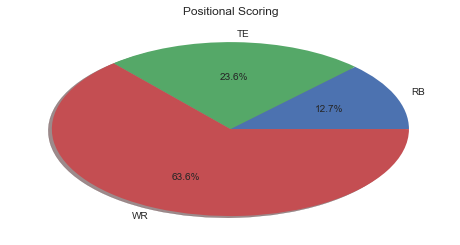

In [44]:
# visual of positional scoring frequency

plt.style.use('seaborn')
f,ax=plt.subplots(figsize=(8,4))
rec['Score'].groupby(rec['Pos']).sum().plot.pie(autopct='%1.1f%%', shadow=True)
ax.set_title('Positional Scoring')
ax.set_ylabel('')
plt.show()

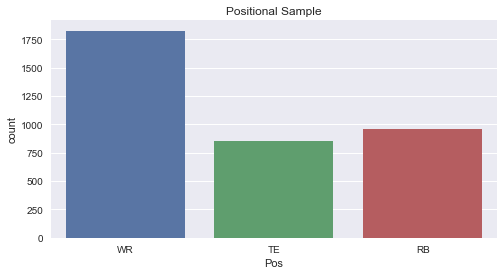

In [45]:
#visual of positional frequency

f,ax=plt.subplots(figsize=(8,4))
sns.countplot('Pos', data=rec)
ax.set_title('Positional Sample')
plt.show()

In [46]:
#length of dataset -- skill players receiving at least one target in a game

print(len(rec))

3645


In [47]:
#WR outpreformed positional frequency relative to scoring frequency -- 63.6% > 50.1%

print('WR frequency: ', 1826/3645)
print('TE frequency: ', 856/3645)
print('RB frequency: ', 963/3645)

WR frequency:  0.500960219478738
TE frequency:  0.23484224965706446
RB frequency:  0.2641975308641975


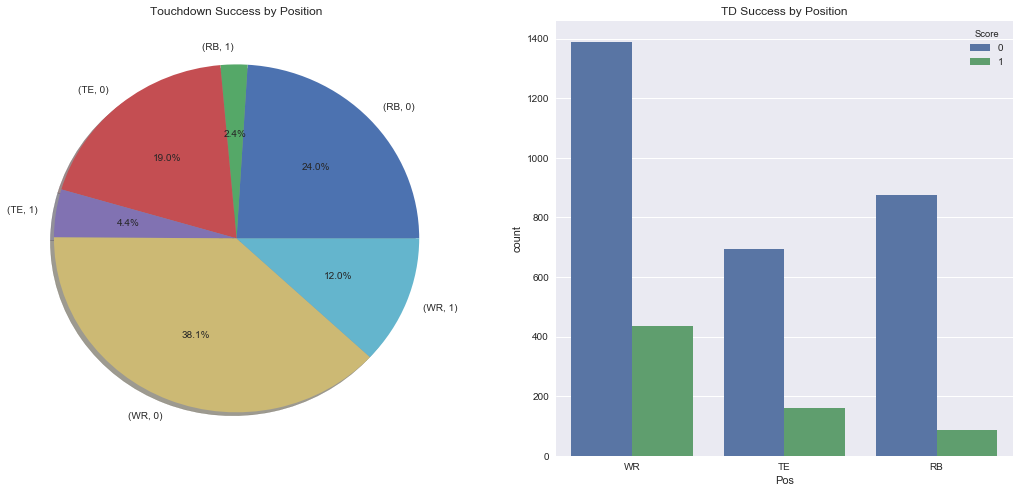

In [48]:
#scoring efficiency
#wr ~33% success rate
#te ~25% success rate
#rb ~10% success rate

f,ax=plt.subplots(1,2, figsize=(18,8))
rec['Score'].groupby(rec['Pos']).value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Touchdown Success by Position')
ax[0].set_ylabel('')
sns.countplot('Pos', hue='Score', data=rec, ax=ax[1])
ax[1].set_title('TD Success by Position')
plt.show()

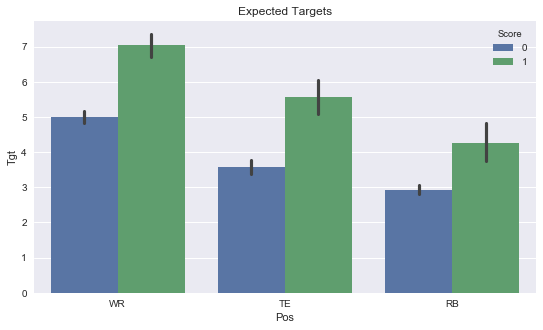

In [49]:
#opportunity as a measure of touchdowns is significant across all positions
#this implies scoring requires more than just a positional component

f,ax=plt.subplots(figsize=(9,5))
sns.barplot('Pos','Tgt', data=rec, hue='Score')
ax.set_title('Expected Targets')
plt.show()

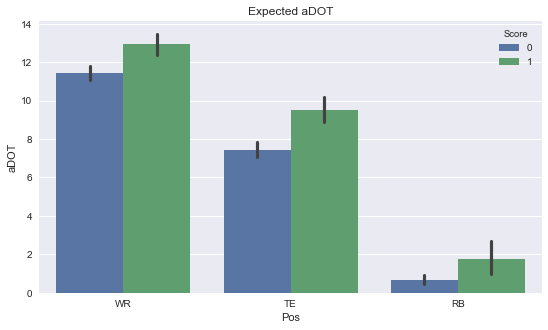

In [50]:
#target distance as a weighted measure of opportunity is significant for wr and te in scoring touchdowns
#rb routes are generally shorter patterns, so this is to be expected

f,ax=plt.subplots(figsize=(9,5))
sns.barplot('Pos','aDOT', data=rec, hue='Score')
ax.set_title('Expected aDOT')
plt.show()

In [51]:
#rb average target distance less than one yard
#46.2% increase in target distance observed for scoring outcomes

print('Score=0: ', rec[rec['Score']==0].aDOT.mean())
print('Score=1: ', rec[rec['Score']==1].aDOT.mean())
print('Score=1: ', rec[rec['Pos']=='RB'].aDOT.mean())
print((10.704-7.32)/7.32)

Score=0:  7.318040540540519
Score=1:  10.703503649635051
Score=1:  0.7762201453790248
0.46229508196721314


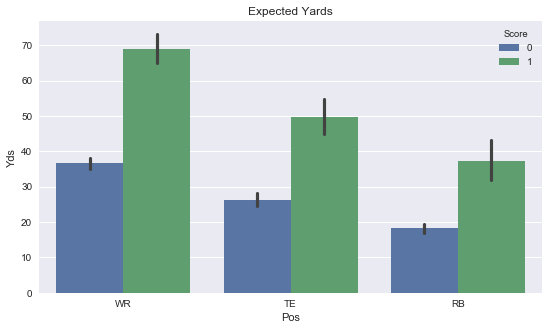

In [52]:
#receiving yards as a function of touchdowns is significant across positions

f,ax=plt.subplots(figsize=(9,5))
sns.barplot('Pos','Yds', data=rec, hue='Score')
ax.set_title('Expected Yards')
plt.show()

In [53]:
#110% average increase in receiving yards for scoring events

print('Score=0: ', rec[rec['Score']==0].Yds.mean())
print('Score=1: ', rec[rec['Score']==1].Yds.mean())
print((60.37-28.76)/28.76)

Score=0:  28.761824324324323
Score=1:  60.36788321167883
1.0990959666203057


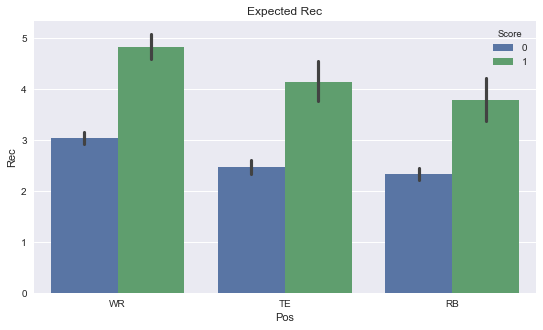

In [54]:
#receptions as a function of touchdowns is significant across positions

f,ax=plt.subplots(figsize=(9,5))
sns.barplot('Pos','Rec', data=rec, hue='Score')
ax.set_title('Expected Rec')
plt.show()

In [55]:
#68.1% expected increase in receptions for scoring events

print('Score=0: ', rec[rec['Score']==0].Rec.mean())
print('Score=1: ', rec[rec['Score']==1].Rec.mean())
print((4.54-2.7)/2.7)

Score=0:  2.6983108108108107
Score=1:  4.543065693430657
0.6814814814814814


In [56]:
#opportunity has huge role in touchdown expectation
#average targets for player who scores a touchdown ~ 6
#touchdown expectation for players receiving at least 6 targets = 33%
#this will be the baseline for model evaluation

print('Score=0: ', rec[rec['Score']==0].Tgt.mean())
print('Score=1: ', rec[rec['Score']==1].Tgt.mean())
print((6.32-3.8)/3.8)
print('Targets>=10: ', rec[rec['Tgt']>=6].Score.mean())

Score=0:  4.0496621621621625
Score=1:  6.338686131386861
0.6631578947368423
Targets>=10:  0.3304867634500427


In [57]:
#more data cleaning
#convert team names to ordinal rank based on matchup data
#convert position names to arbitrary values for processing

rec['Opp'].replace(['DEN','HST', 'MIN', 'ARZ', 'JAX', 'BUF', 'CHI', 'SEA', 'BLT',
                   'LA', 'CIN', 'NE', 'PHI', 'SF', 'MIA', 'PIT', 'NYJ', 'KC', 'DET',
                   'SD', 'CLV', 'TB', 'NYG', 'OAK', 'WAS', 'DAL', 'IND', 'ATL', 'CAR',
                   'TEN', 'GB', 'NO'], [1, 2, 3 , 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
                                       27, 28, 29, 30, 31, 32], inplace=True)

rec['Team'].replace(['ATL', 'NO', 'NE', 'GB', 'DAL', 'ARZ', 'OAK', 'IND', 'SD',
                    'PIT', 'BUF', 'WAS', 'KC', 'TEN', 'CAR', 'PHI', 'MIA', 'SEA',
                    'TB', 'DET', 'BLT', 'DEN', 'MIN', 'CIN', 'JAX', 'NYG', 'SF',
                    'CHI', 'HST', 'NYJ', 'CLV', 'LA'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                       11, 12, 13, 14, 15, 16, 17, 18, 19,
                                                       20, 21, 22, 23, 24, 25, 26, 27, 28,
                                                       29, 30, 31, 32], inplace=True)

rec['Pos'].replace(['WR', 'TE', 'RB'], [0, 1, 2], inplace=True)
print(rec.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3645 entries, 0 to 3839
Data columns (total 19 columns):
Player    3645 non-null object
Team      3645 non-null int64
Opp       3645 non-null int64
Pos       3645 non-null int64
G         3645 non-null int64
Tgt       3645 non-null int64
Rec       3645 non-null int64
Yds       3645 non-null int64
TD        3645 non-null int64
Score     3645 non-null int64
C %       3645 non-null float64
aDOT      3645 non-null float64
YPR       3645 non-null float64
YPT       3645 non-null float64
YAC       3645 non-null float64
FPTS      3645 non-null float64
RXP       3645 non-null float64
QBR       3645 non-null float64
Sk        3645 non-null float64
dtypes: float64(9), int64(9), object(1)
memory usage: 729.5+ KB
None


In [58]:
#convert matchup ranking to a range for better interpretation

rec['Opp_range'] = 0
rec.loc[rec['Opp']<=6, 'Opp_range'] = 0
rec.loc[(rec['Opp']>6) & (rec['Opp']<=12), 'Opp_range'] = 1
rec.loc[(rec['Opp']>12) & (rec['Opp']<=18), 'Opp_range'] = 2
rec.loc[(rec['Opp']>18) & (rec['Opp']<=24), 'Opp_range'] = 3
rec.loc[rec['Opp']>24, 'Opp_range'] = 4

In [59]:
#Reorder features for convenience
data = rec[['Score','Opp_range','Pos', 'Tgt','aDOT','Yds']]

#ready for processing
X=data[['Opp_range','Pos', 'Tgt','aDOT','Yds']]  #features
#X=np.c_[X,X.values[:,0]*X.values[:,1]]
y=data['Score']  #label
data.tail(10)

,Score,Opp_range,Pos,Tgt,aDOT,Yds
3829,0,1,2,2,-2.5,8
3830,0,1,2,1,-1.0,3
3831,0,1,2,2,11.0,6
3832,0,1,2,1,29.0,0
3833,0,1,2,2,5.0,13
3834,0,1,2,1,0.0,5
3836,0,1,2,5,0.2,41
3837,0,1,2,3,1.3,6
3838,0,1,2,1,-3.0,-2
3839,1,1,2,1,-3.0,17


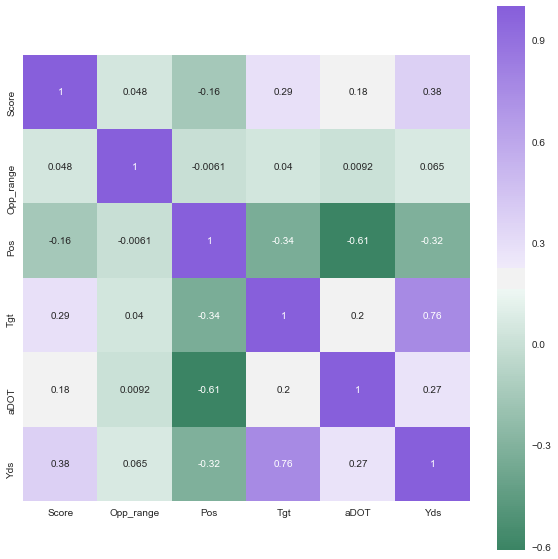

In [60]:
#skill positional scoring less about matchup and more about volume

f,ax = plt.subplots(figsize=(10,10))
corr = data.corr()
cmap = sns.diverging_palette(150,275, as_cmap=True)
sns.heatmap(corr,cmap=cmap, square=True,annot=True)
plt.show()

In [ ]:
#how predictive are receivers fantasy output relative to TE in terms of mkt share, etc.
#use groupby week and filter for target threshold in relation to fantasy output rank
#examine fantasy output rank in relation to TD for week - how big is impact of TD on fantasy output rank
#examine variation in volume by position
#examine significance of snaps for TE
#filter volume for TE by week
#filter TD scored relative to volume by week for each position
#examine avg volume per week by position
#examine weekly production of >25 touches for rb

In [64]:
#split into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

2916
729
2916
729


In [65]:
#train model using accuracy as evaluation metric

accuracy_train=[]
std_dev=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
m=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(),
   DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier()]

for i in m:
    score = cross_val_score(i, X_train, y_train, cv=3, scoring='accuracy')
    accuracy_train.append(score.mean())
    std_dev.append(score.std())
mods = pd.DataFrame({'Acc': acc_results, 'Std': std_results}, index=classifiers)
mods

#little variation wrt accuracy for models likely due to skew of dataset towards non-scoring outcomes ~80% of dataset

,Acc,Std
Linear Svm,0.812072,0.000357
Radial Svm,0.802471,0.006829
Logistic Regression,0.817900,0.005283
KNN,0.790465,0.007652
Decision Tree,0.735259,0.007456
Naive Bayes,0.797319,0.009808
Random Forest,0.789102,0.008352


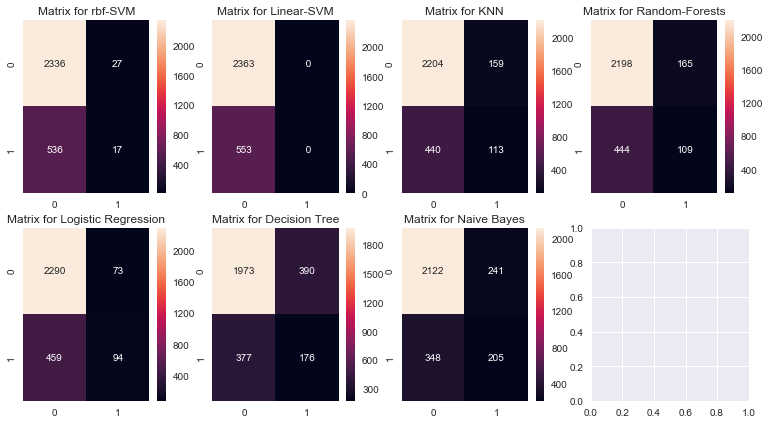

In [66]:
#train model using f1 score as evaluation metric
#visual of confusion matrix for each classifier

f,ax=plt.subplots(2,4,figsize=(13,7))
pred = cross_val_predict(svm.SVC(kernel='rbf'),X_train,y_train,cv=3)
sns.heatmap(metrics.confusion_matrix(y_train,pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
pred = cross_val_predict(svm.SVC(kernel='linear'),X_train,y_train,cv=3)
sns.heatmap(metrics.confusion_matrix(y_train,pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
pred = cross_val_predict(KNeighborsClassifier(),X_train,y_train,cv=3)
sns.heatmap(metrics.confusion_matrix(y_train,pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
pred = cross_val_predict(RandomForestClassifier(),X_train,y_train,cv=3)
sns.heatmap(metrics.confusion_matrix(y_train,pred),ax=ax[0,3],annot=True,fmt='2.0f')
ax[0,3].set_title('Matrix for Random-Forests')
pred = cross_val_predict(LogisticRegression(),X_train,y_train,cv=3)
sns.heatmap(metrics.confusion_matrix(y_train,pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Logistic Regression')
pred = cross_val_predict(DecisionTreeClassifier(),X_train,y_train,cv=3)
sns.heatmap(metrics.confusion_matrix(y_train,pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Decision Tree')
pred = cross_val_predict(GaussianNB(),X_train,y_train,cv=3)
sns.heatmap(metrics.confusion_matrix(y_train,pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

In [67]:
#f-scores for training set

f_scores=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
m=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(),
   DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier()]

for i in m:
    pred = cross_val_predict(i, X_train, y_train, cv=3)
    f_scores.append(metrics.f1_score(y_train, pred))
f_ones = pd.DataFrame({'Models': classifiers ,'F': f_scores})
f_ones

C:\Users\bryho\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,F,Models
0,0.000000,Linear Svm
1,0.056951,Radial Svm
2,0.261111,Logistic Regression
3,0.273939,KNN
4,0.291367,Decision Tree
5,0.410410,Naive Bayes
6,0.257179,Random Forest


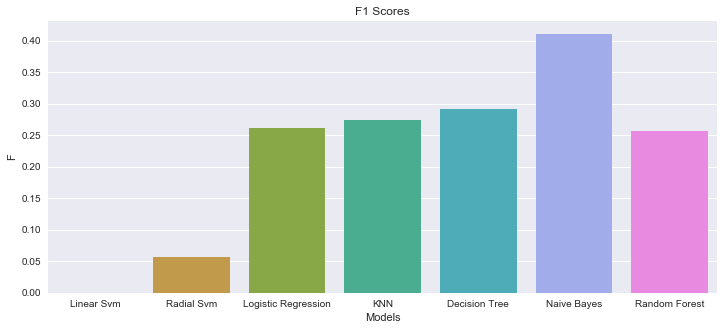

In [68]:
f,ax=plt.subplots(figsize=(12,5))
sns.barplot('Models', 'F', data=f_ones, ci=None)
ax.set_title('F1 Scores')
plt.show()

In [70]:
#hyperparameter tuning and test set evaluation

accuracy = []
f1_scores = []
models = []
accuracy.append(0.33)
f1_scores.append(0.33)
models.append('Baseline')

In [71]:
#logistic reg

model = LogisticRegression()
model.fit(X_train, y_train)
p1 = model.predict(X_test)
print('Logistic Regression accuracy: ', metrics.accuracy_score(p1, y_test))
print('Logistic Regression f1-score: ', metrics.f1_score(y_test, p1))

Logistic Regression accuracy:  0.831275720165
Logistic Regression f1-score:  0.28901734104


In [72]:
accuracy.append(0.811197916667)
f1_scores.append(metrics.f1_score(y_test, p1))
models.append('LR')

In [ ]:
#SVM hyperparameter tuning
Cs = [0.01 ,0.1, 0.25, 1, 5, 7, 10]
gammas = [0.01, 0.1, 0.25, 0.5, 0.75, 1]
kernels = ['linear', 'rbf']
param_grid = {'C': Cs, 'gamma': gammas, 'kernel': kernels}
grid_search = GridSearchCV(svm.SVC(), param_grid, cv=3)
grid_search.fit(X,y)
print(grid_search.best_params_)

In [23]:
#rbf svm
model = svm.SVC(kernel='rbf', C=5, gamma=0.1)
model.fit(X_train, y_train)
p2 = model.predict(X_test)
print('RBF SVM accuracy: ', metrics.accuracy_score(p2, y_test))
print('RBF SVM f1-score: ', metrics.f1_score(y_test, p2))

RBF SVM accuracy:  0.807291666667


In [29]:
accuracy.append(0.807291666667)
f1_scores.append(metrics.f1_score(y_test, p2))
models.append('RBF-SVM')

In [39]:
#Decision Tree hyperparameter tuning
model = DecisionTreeClassifier()
depth = [2, 4, 6, 8, 10]
param_grid = {"max_depth": depth}
grid_search = GridSearchCV(model, param_grid, cv=3)
grid_search.fit(X,y)
print(grid_search.best_params_)

{'max_depth': 4}


In [25]:
#decision tree
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)
p3 = model.predict(X_test)
print('Decision Tree accuracy: ', metrics.accuracy_score(p3, y_test))
print('Decision Tree f1-score: ', metrics.f1_score(y_test, p3))

Decision Tree Classifier:  0.791666666667


In [30]:
accuracy.append(0.791666666667)
f1_scores.append(metrics.f1_score(y_test, p3))
models.append('Decision Tree')

In [17]:
#knn hyperparameter tuning
model = KNeighborsClassifier()
neighbors = list(range(1,21,1))
param_grid = {"n_neighbors": neighbors}
grid_search = GridSearchCV(model, param_grid, cv=3)
grid_search.fit(X,y)
print(grid_search.best_params_)

{'n_neighbors': 10}


In [31]:
#knn

model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)
p4 = model.predict(X_test)
print('KNeighbors accuracy: ', metrics.accuracy_score(p4, y_test))
print('KNeighbors f1-score: ', metrics.f1_score(y_test, p4))

KNeighbors Classifier:  0.802083333333


In [32]:
accuracy.append(0.802083333333)
f1_scores.append(metrics.f1_score(y_test, p4))
models.append('KNN')

In [91]:
#naive bayes

model = GaussianNB()
model.fit(X_train, y_train)
p5 = model.predict(X_test)
print('GaussianNB accuracy: ', metrics.accuracy_score(p5, y_test))
print('GaussianNB f1-score: ', metrics.f1_score(y_test, p5))

GaussianNB:  0.813443072702


In [33]:
accuracy.append(0.813443072702)
f1_scores.append(metrics.f1_score(y_test, p5))
models.append('GaussianNB')

In [93]:
#random forest

model = RandomForestClassifier()
model.fit(X_train, y_train)
p6 = model.predict(X_test)
print('Random Forest accuracy: ', metrics.accuracy_score(p6, y_test))
print('Random Forest f1-score: ', metrics.f1_score(y_test, p6))

Random Forest Classifier:  0.810699588477


In [34]:
accuracy.append(0.810699588477)
f1_scores.append(metrics.f1_score(y_test, p6))
models.append('Random Forest')

In [39]:
ml_acc_results = pd.DataFrame({'Models': models, 'Results': accuracy})
ml_f1_results = pd.DataFrame({'Models': models, 'Results': f1_scores})

In [44]:
print(models)
print(accuracy)
print(f1_scores)

['Baseline', 'LR', 'RBF-SVM', 'Decision Tree', 'KNN', 'GaussianNB', 'Random Forest', 'Voting', 'AdaBoost']
[0.33, 0.811197916667, 0.807291666667, 0.791666666667, 0.802083333333, 0.813443072702, 0.810699588477, 0.816186556927, 0.823593964335]


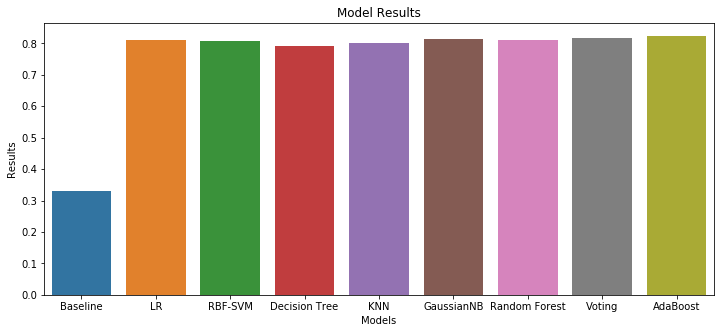

In [43]:
f,ax=plt.subplots(figsize=(12,5))
sns.barplot('Models','Results', data=ml_acc_results, ci=None)
ax.set_title('Test Set Accuracy')
plt.show()

In [ ]:
f,ax=plt.subplots(figsize=(12,5))
sns.barplot('Models','Results', data=ml_f1_results, ci=None)
ax.set_title('Test Set F1 Scores')
plt.show()